# Zadanie 

Plik [dane/diabetes.csv](dane/diabetes.csv)zawiera dane `n=442` pacjentów chorych na cukrzycę (`diabetes`). Każdy przypadek opisany jest 10 zmiennymi numerycznymi:  wiek (`AGE`), płeć (`SEX`), wskaźnik masy ciała (`BMI`), średnie ciśnienie krwi (`BP`) i sześć pomiarów surowicy krwi (`S1 S2 S3 S4 S5 S6`). Ostatnia kolumna (zmienna `Y`) zawiera wartości określające stopnień zaawansowania choroby. Zadanie polega na zbudowaniu modeli regresji liniowej przewidujących wartość zmiennej `Y` zgodnie z poniższymi wytycznymi.

1. Wczytaj plik i sprawdź, czy w danych występują braki oraz sprawdź, czy wszystkie zmienne są wartościami numerycznymi. Jeżeli zajdzie potrzeba usuń obserwacje zawierające braki a zmienne przetransformuj do postaci numerycznej.

In [2]:
import pandas as pd

df = pd.read_csv('./dane/diabetes.csv')

print(df.select_dtypes(include=['object']).columns.tolist())

print(df.isna().sum())

[]
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


2. Podziel dane w sposób losowy na dwie części: treningową i testową w stosunku 50%/50%.  
Do podziału danych możesz wykorzystać funkcję [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) z pakietu scikit-learn.

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Y')
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=666)

print('Ilość przypadków treningowych %d ' % len(X_train))
print('Ilość przypadków testowych    %d ' % len(X_test))

Ilość przypadków treningowych 221 
Ilość przypadków testowych    221 


3. Sporządź wykres parowy [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) dla części treningowej zbioru danych i na jego podstawie wybierz jedną zmienną, która wydaje się posiadać liniową zależność względem zmiennej wyjściowej `Y`. Zbuduj model regresji liniowej dla wybranej zmiennej. Oceń skuteczność metody wyznaczając  błąd MSE lub miarę R2 modelu na zbiorze testowym.

<Figure size 1500x500 with 0 Axes>

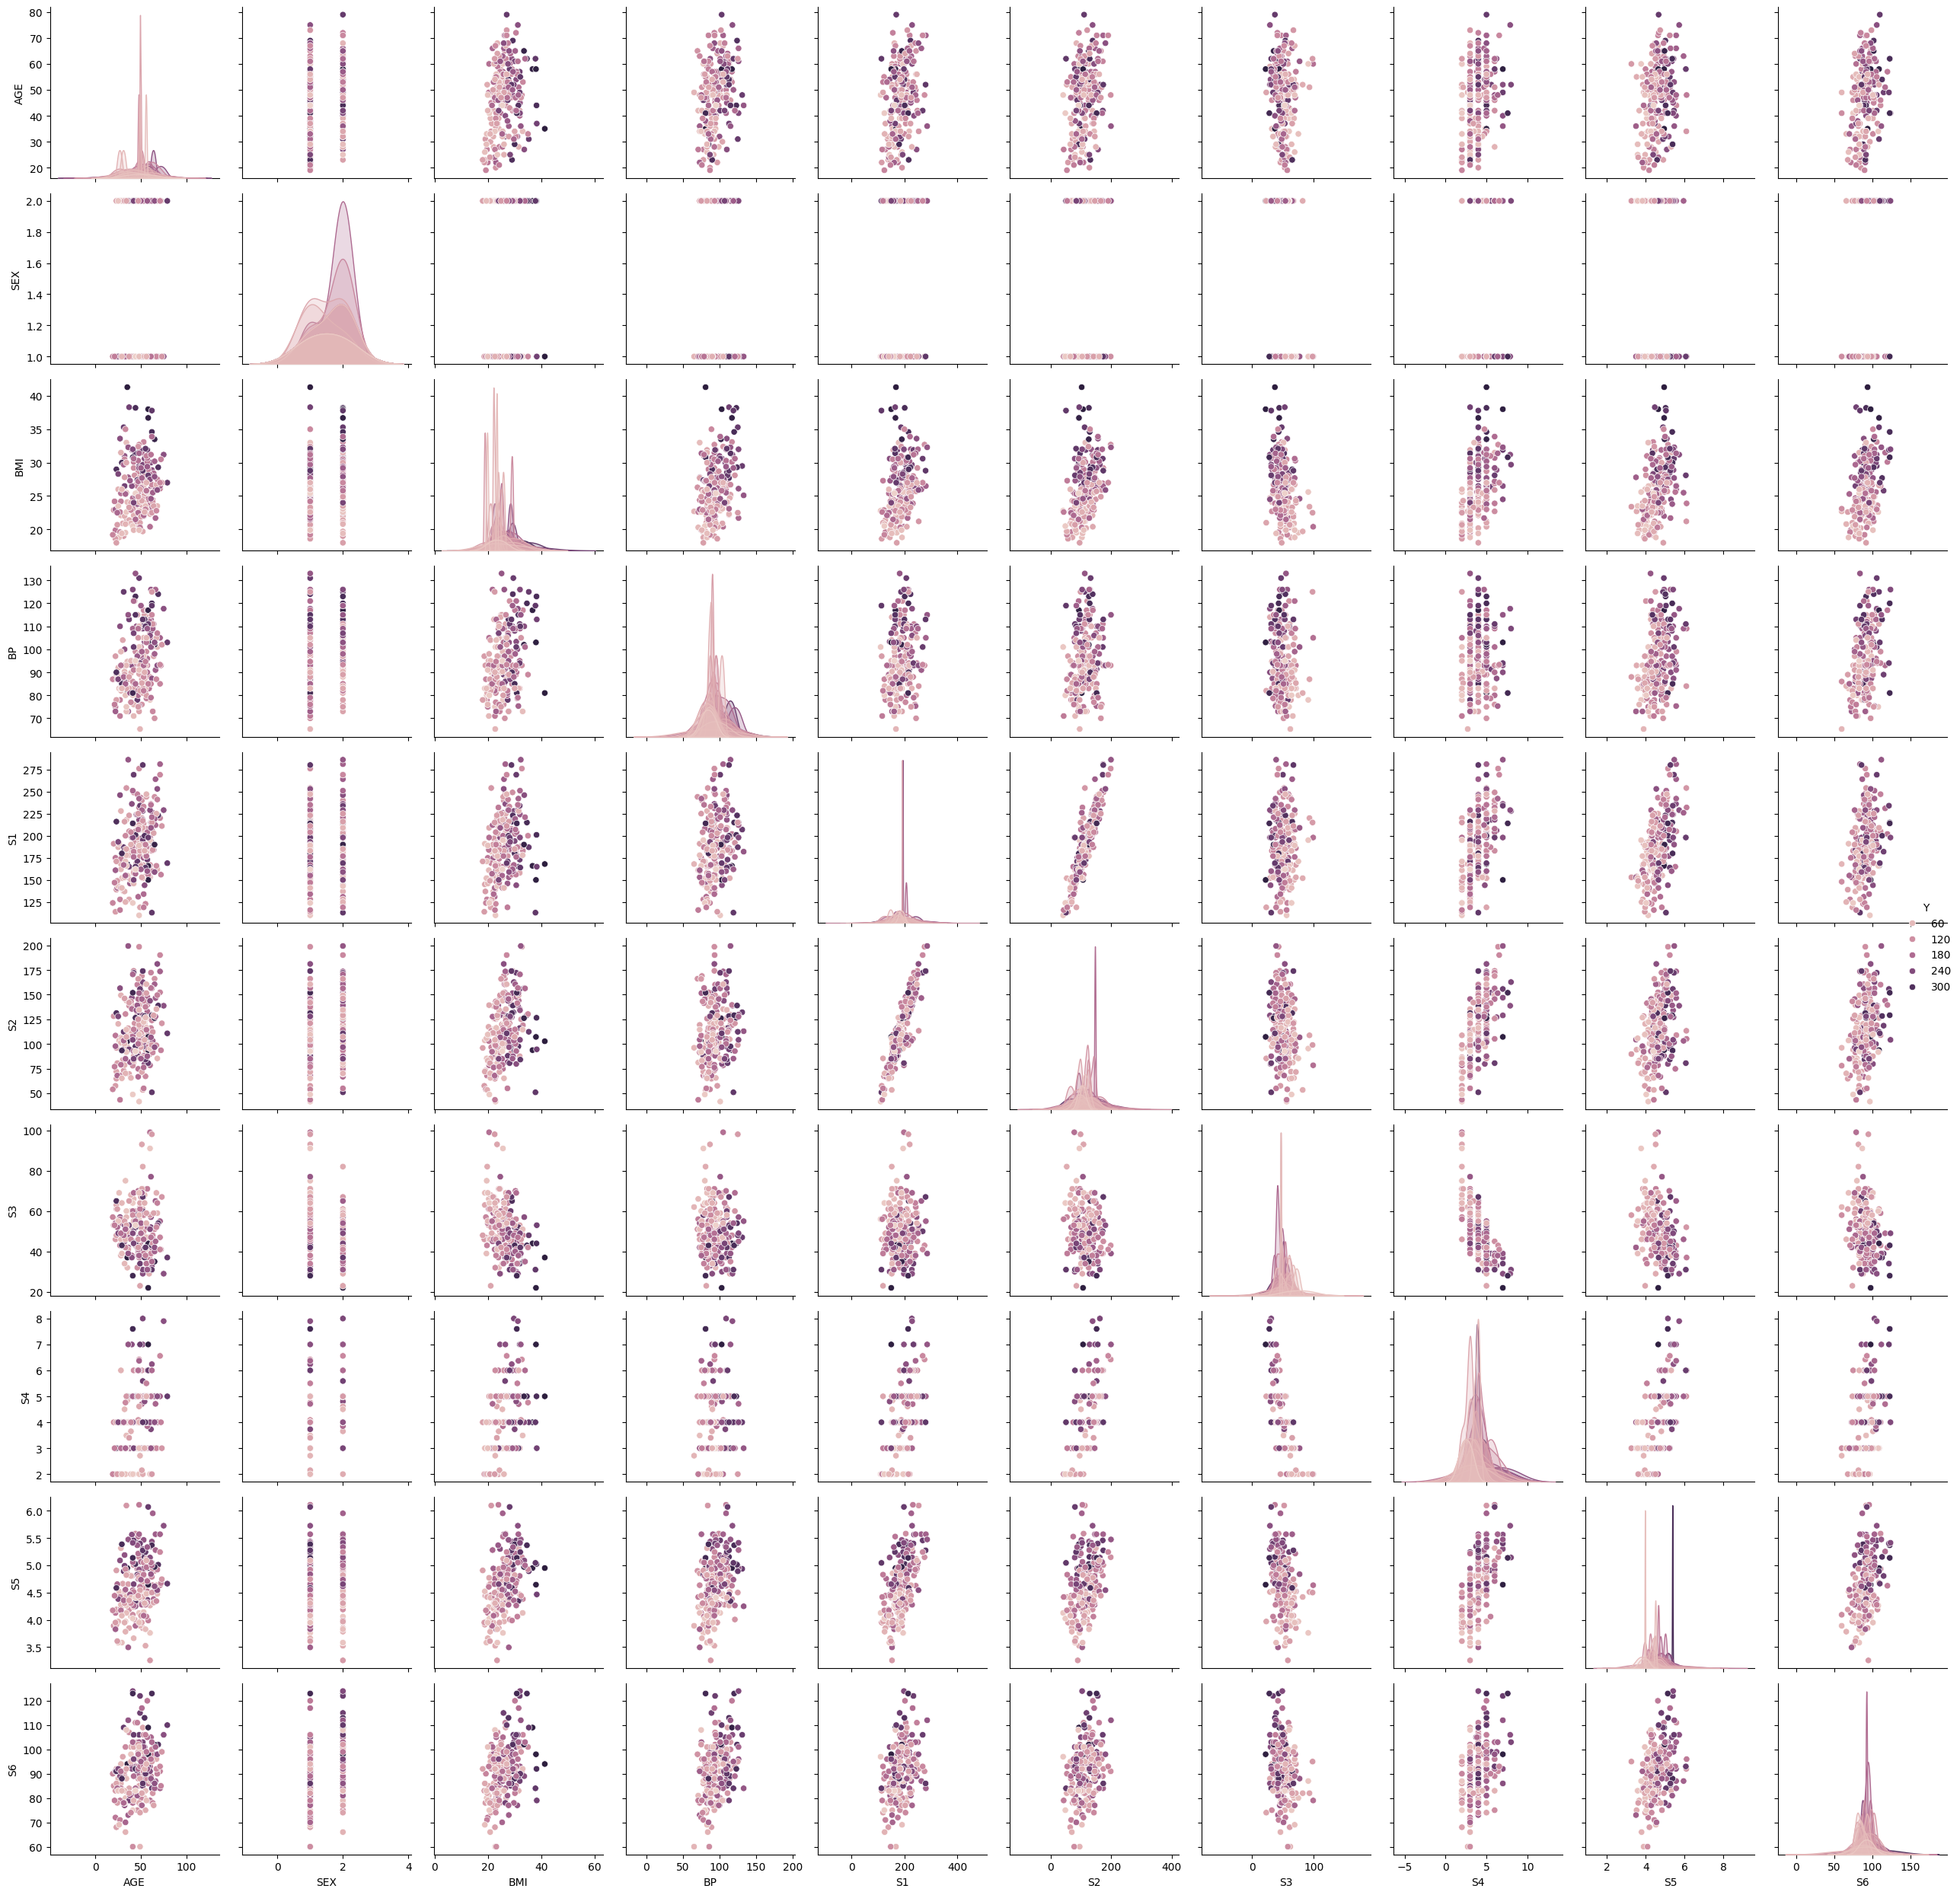

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(15,5))

sns.pairplot(train_data, hue='Y', diag_kind='kde')
plt.tight_layout()
plt.show()



MSE: 4171.082
R2: 0.320


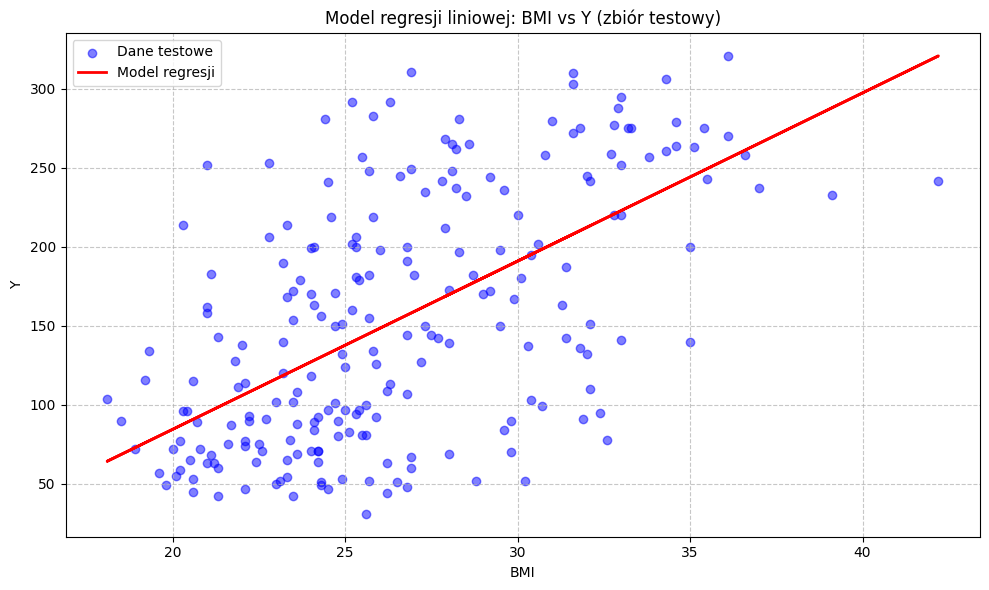

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_bmi = X_train[['BMI']]
X_test_bmi = X_test[['BMI']]

model = LinearRegression()
model.fit(X_train_bmi, y_train)

y_test_pred = model.predict(X_test_bmi)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MSE: %.3f' % mse)
print('R2: %.3f' % r2)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_bmi, y_test, color='blue', alpha=0.5, label='Dane testowe')
plt.plot(X_test_bmi, y_test_pred, color='red', linewidth=2, label='Model regresji')
plt.title('Model regresji liniowej: BMI vs Y (zbiór testowy)')
plt.xlabel('BMI')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


4. Zbuduj drugi model regresji liniowej wykorzystując wszystkie zmienne ze zbioru treningowego.  Zastosuj w tym celu jedną, wybraną metodę z regularyacją (grzbietową lub lasso). Przeprowadź obliczenia dla przynajmniej 2 różnych wartości współczynnika określającego siłę regularyzacji $\alpha$ i porównaj wyniki. 

Alpha: 0.01, MSE: 2953.811, R2: 0.518
Alpha: 0.1, MSE: 2962.771, R2: 0.517
Alpha: 1, MSE: 3080.524, R2: 0.498
Alpha: 10, MSE: 3232.373, R2: 0.473
Alpha: 100, MSE: 3795.860, R2: 0.381


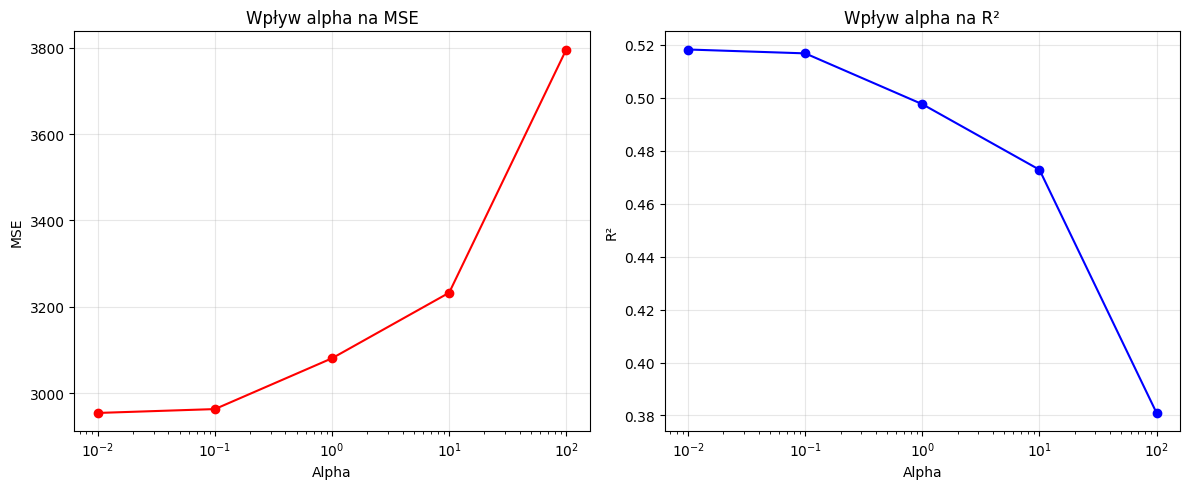

In [7]:
from sklearn.linear_model import Lasso

alpha_values = [0.01, 0.1, 1, 10, 100]
mse_values = []
r2_values = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000, random_state=666)
    lasso_model.fit(X_train, y_train)

    y_test_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)

    print(f'Alpha: {alpha}, MSE: {mse:.3f}, R2: {r2:.3f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_values, 'o-', color='red')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Wpływ alpha na MSE')
plt.xscale('log')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(alpha_values, r2_values, 'o-', color='blue')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('Wpływ alpha na R²')
plt.xscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

5. Spośród wszystkich modeli regresji uzyskanych w poprzednich punktach wybierz ten, który wg. Ciebie jest najlepszy i wypisz jego współczynniki regresji.

In [9]:
best_alpha = 0.01
lasso_model = Lasso(alpha=best_alpha, max_iter=10000, random_state=666)
lasso_model.fit(X_train, y_train)

feature_names = X_train.columns
coef_values = lasso_model.coef_

print("Współczynniki regresji Lasso:")

for feature, coef in zip(feature_names, coef_values):
    print(f"{feature}: {coef:.4f}")

Współczynniki regresji Lasso:
AGE: -0.0626
SEX: -16.4872
BMI: 7.4199
BP: 0.8748
S1: -0.6770
S2: 0.2298
S3: 0.0873
S4: 5.3319
S5: 57.4684
S6: 0.0127
